In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from datetime import datetime

from utility import *

In [2]:
LOOKBACK = 61
TRAIN_SPLIT_RATIO = 0.9
columns = [CLOSE_INDEX]

In [3]:
todays_date = datetime.now().strftime('%Y-%m-%d')
download_monthly_klines('spot', [ETH], ['15m'], '2019-01-01', todays_date, 'train')

Found 1 symbols
[1/1] - start download monthly ETHUSDT klines 

File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-01.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-02.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-03.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-04.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-05.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-06.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-07.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-08.zip
[##################################################]
File Download: /

In [4]:
dataframe = get_data('train', ETH)

train/ETHUSDT/ETHUSDT-15m-2019-01.csv
train/ETHUSDT/ETHUSDT-15m-2019-02.csv
train/ETHUSDT/ETHUSDT-15m-2019-03.csv
train/ETHUSDT/ETHUSDT-15m-2019-04.csv
train/ETHUSDT/ETHUSDT-15m-2019-05.csv
train/ETHUSDT/ETHUSDT-15m-2019-06.csv
train/ETHUSDT/ETHUSDT-15m-2019-07.csv
train/ETHUSDT/ETHUSDT-15m-2019-08.csv
train/ETHUSDT/ETHUSDT-15m-2019-09.csv
train/ETHUSDT/ETHUSDT-15m-2019-10.csv
train/ETHUSDT/ETHUSDT-15m-2019-11.csv
train/ETHUSDT/ETHUSDT-15m-2019-12.csv
train/ETHUSDT/ETHUSDT-15m-2020-01.csv
train/ETHUSDT/ETHUSDT-15m-2020-02.csv
train/ETHUSDT/ETHUSDT-15m-2020-03.csv
train/ETHUSDT/ETHUSDT-15m-2020-04.csv
train/ETHUSDT/ETHUSDT-15m-2020-05.csv
train/ETHUSDT/ETHUSDT-15m-2020-06.csv
train/ETHUSDT/ETHUSDT-15m-2020-07.csv
train/ETHUSDT/ETHUSDT-15m-2020-08.csv
train/ETHUSDT/ETHUSDT-15m-2020-09.csv
train/ETHUSDT/ETHUSDT-15m-2020-10.csv
train/ETHUSDT/ETHUSDT-15m-2020-11.csv
train/ETHUSDT/ETHUSDT-15m-2020-12.csv
train/ETHUSDT/ETHUSDT-15m-2021-01.csv
train/ETHUSDT/ETHUSDT-15m-2021-02.csv
train/ETHUSD

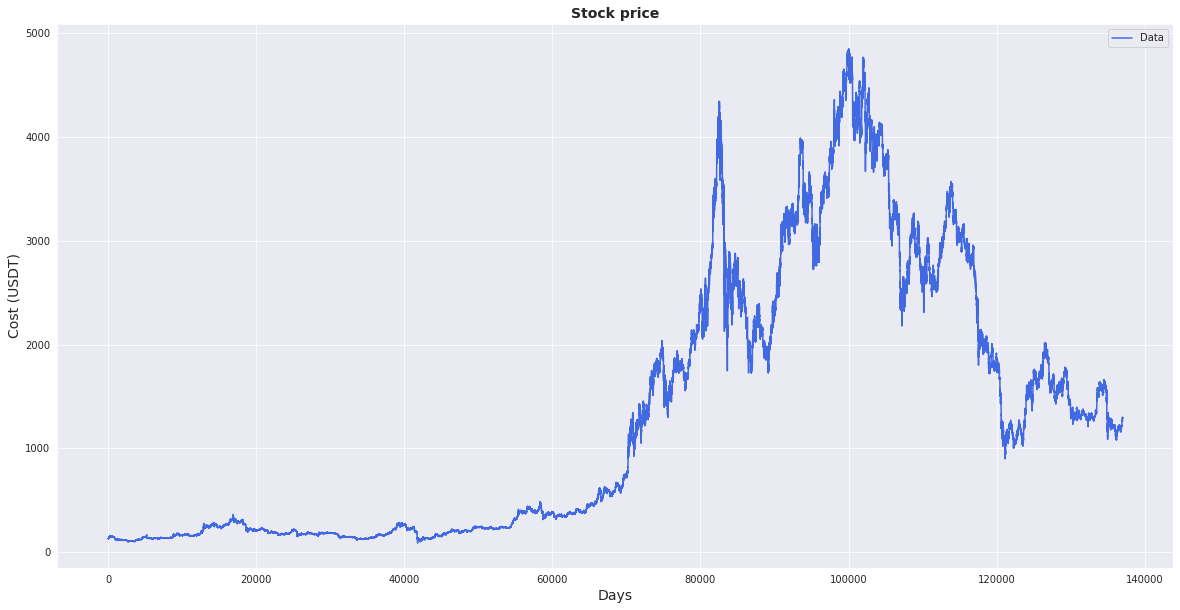

In [5]:
dataframe = dataframe[dataframe[IGNORE_INDEX] == 0]
plot_graph(pd.DataFrame(dataframe[CLOSE_INDEX].values))

In [6]:
df1 = dataframe[columns]
df1['Time'] = np.arange(len(dataframe.index))

<ipython-input-6-58f6e072887f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Time'] = np.arange(len(dataframe.index))


In [7]:
X = df1.loc[:, ['Time']]
y = df1.loc[:, CLOSE_INDEX]

In [8]:
number_of_rows = TRAIN_SPLIT_RATIO * len(X.index)

X_train = X.loc[:number_of_rows]
y_train = y.loc[:number_of_rows]
X_test = X.loc[number_of_rows:]
y_test = y.loc[number_of_rows:]

print('X_train.shape = {}'.format(X_train.shape))
print('y_train.shape = {}'.format(y_train.shape))
print('X_test.shape = {}'.format(X_test.shape))
print('y_test.shape = {}'.format(y_test.shape))

X_train.shape = (123315, 1)
y_train.shape = (123315,)
X_test.shape = (13701, 1)
y_test.shape = (13701,)


In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = pd.Series(linear_model.predict(X_train), index=X_train.index)

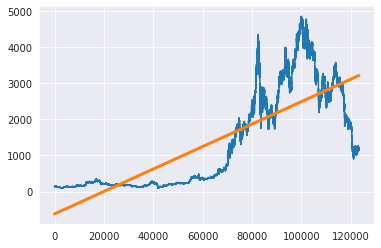

In [10]:
ax = y_train.plot()
ax = y_train_pred.plot(ax=ax, linewidth=3)

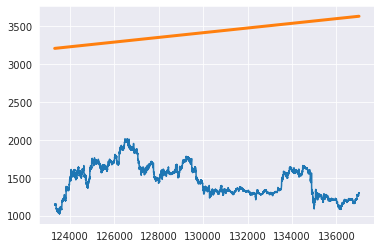

In [11]:
y_test_pred = pd.Series(linear_model.predict(X_test), index=X_test.index)

ax = y_test.plot()
ax = y_test_pred.plot(ax=ax, linewidth=3)

In [12]:
rmse(y_train, y_train_pred, 'Train')
rmse(y_test, y_test_pred, 'Test')

Train Score: 7.96e+02 RMSE
Test Score: 1.98e+03 RMSE


In [13]:
Lag = dataframe[CLOSE_INDEX].shift(1)
df1['Lag'] = Lag

<ipython-input-13-0393f7f14092>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Lag'] = Lag


In [14]:
X = df1.loc[:, ['Lag']]
X.dropna(inplace=True)
y = df1.loc[:, CLOSE_INDEX]
y, X = y.align(X, join='inner')

In [15]:
number_of_rows = TRAIN_SPLIT_RATIO * len(X.index)

X_train = X.loc[:number_of_rows]
y_train = y.loc[:number_of_rows]
X_test = X.loc[number_of_rows:]
y_test = y.loc[number_of_rows:]

print('X_train.shape = {}'.format(X_train.shape))
print('y_train.shape = {}'.format(y_train.shape))
print('X_test.shape = {}'.format(X_test.shape))
print('y_test.shape = {}'.format(y_test.shape))

X_train.shape = (123313, 1)
y_train.shape = (123313,)
X_test.shape = (13702, 1)
y_test.shape = (13702,)


In [16]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = pd.Series(linear_model.predict(X_train), index=X_train.index)

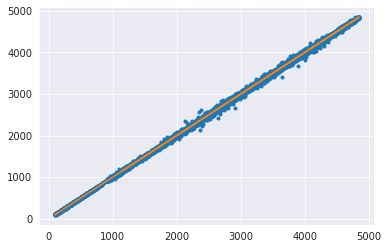

In [17]:
fig, ax = plt.subplots()

ax.plot(X_train['Lag'], y_train, '.')
ax.plot(X_train['Lag'], y_train_pred)

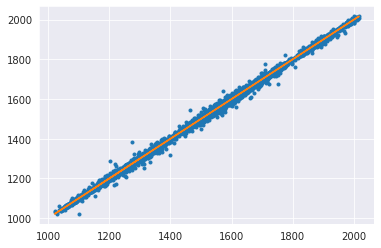

In [18]:
y_test_pred = pd.Series(linear_model.predict(X_test), index=X_test.index)

fig, ax = plt.subplots()

ax.plot(X_test['Lag'], y_test, '.')
ax.plot(X_test['Lag'], y_test_pred)

In [19]:
rmse(y_train, y_train_pred, 'Train')
rmse(y_test, y_test_pred, 'Test')

Train Score: 9.47 RMSE
Test Score: 6.74 RMSE
